In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.figure
import matplotlib.pyplot as plt
import math
from sklearn.datasets import  load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
file_upload = files.upload()

Saving online_shoppers_intentions2.csv to online_shoppers_intentions2.csv


In [ ]:
import io
data= pd.read_csv(io.BytesIO(file_upload['online_shoppers_intentions2.csv']))

#Data Description

In [ ]:
data.shape

(12330, 18)

In [ ]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,iPAd OS,Mozilla Firefox,Spain,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,iOS,Chrome,Spain,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,MacOS,Mozilla Firefox,US,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,Android,Chrome,UK,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,Android,FireFoxFocus,Spain,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,MacOS,Puffin,Spain,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,Android,Chrome,Spain,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,Android,Chrome,Spain,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,iOS,Chrome,France,11,Returning_Visitor,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [ ]:
data.isna().sum()

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   0
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                85
Weekend                     0
Revenue                     0
dtype: int64

In [ ]:
data.describe(include=object)

,Month,OperatingSystems,Browser,Region,VisitorType
count,12330,12330,12330,12330,12245
unique,10,8,11,9,2
top,May,iOS,Chrome,Spain,Returning_Visitor
freq,3364,6601,8428,4780,10551


In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,20.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


#FILLNA

In [ ]:
#Handling Missing Values
fill_null_values = data['VisitorType'].dropna().tolist()
data['VisitorType'] = data['VisitorType'].fillna(pd.Series(np.random.choice(fill_null_values , size = len(data.index))))

#EXploratory Data Analysis

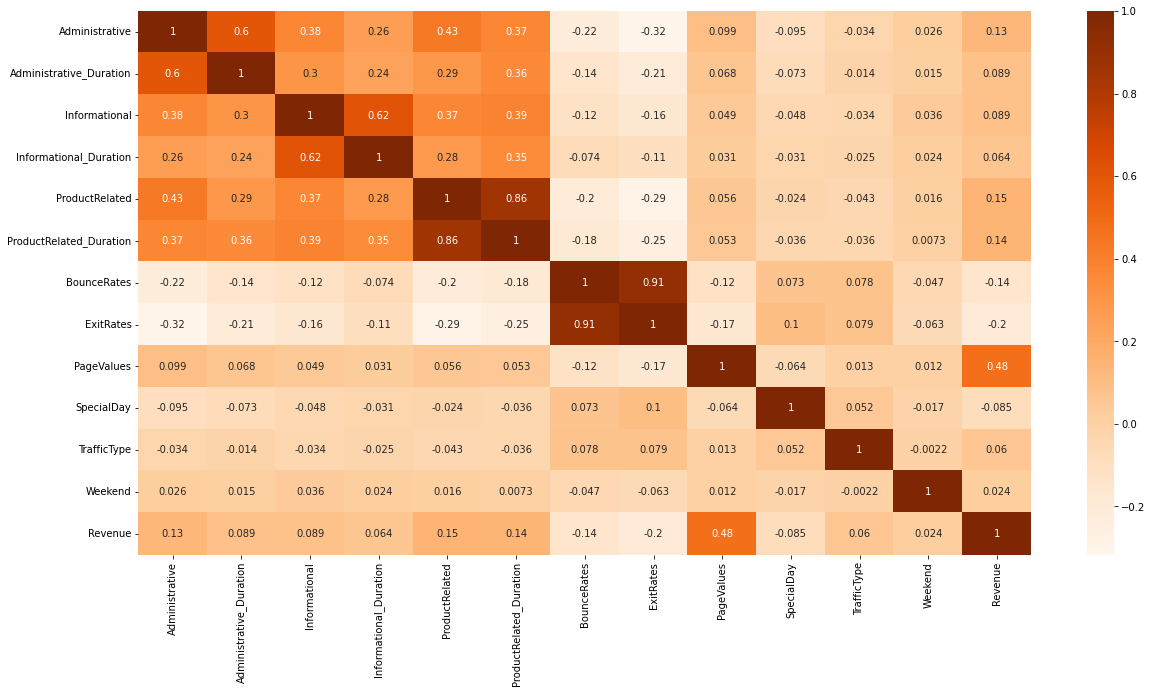

In [ ]:
plt.figure(figsize=(20,10))
correlation = data.corr()
sns.heatmap(correlation, cmap="Oranges", annot=True)

In [ ]:
Rev_count=data.Revenue.value_counts()
Rev_count

False    10323
True      2007
Name: Revenue, dtype: int64

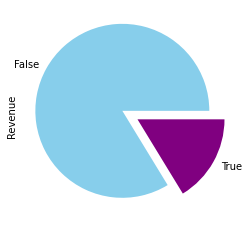

In [ ]:
data.Revenue.value_counts().plot(kind='pie',explode = (0.1, 0.1), colors=['skyblue', 'purple'])

Text(0.5, 1.0, 'Different PageValues and Revenue Generation')

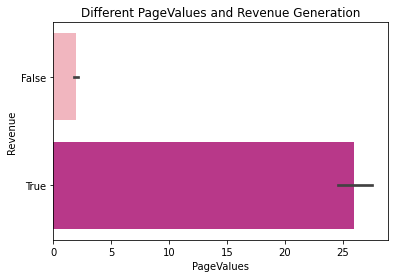

In [ ]:
sns.barplot(x=data['PageValues'], y=data['Revenue'], palette='RdPu', orient='h')
plt.title('Different PageValues and Revenue Generation')

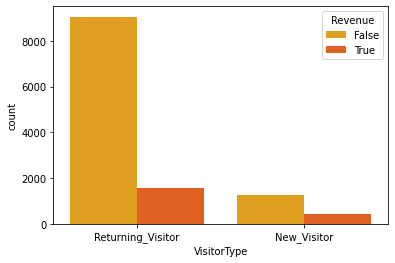

In [ ]:
sns.countplot(x="VisitorType",hue="Revenue",data=data, palette='autumn_r')

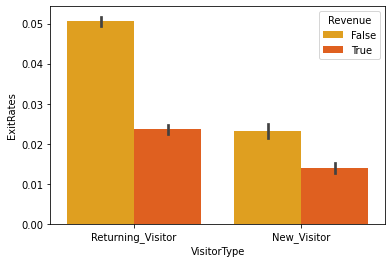

In [ ]:
sns.barplot(x="VisitorType", y="ExitRates",hue="Revenue",data=data, palette='autumn_r')

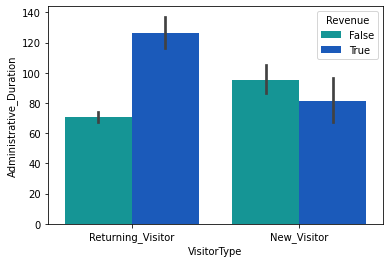

In [ ]:
sns.barplot(x="VisitorType", y="Administrative_Duration",hue="Revenue",data=data, palette='winter_r')

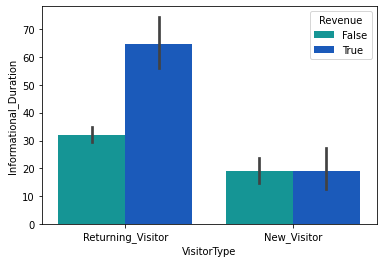

In [ ]:
sns.barplot(x="VisitorType", y="Informational_Duration",hue="Revenue",data=data, palette='winter_r')

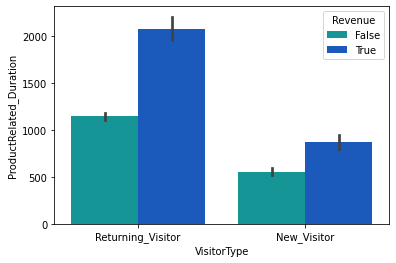

In [ ]:
sns.barplot(x="VisitorType", y="ProductRelated_Duration",hue="Revenue",data=data, palette='winter_r')

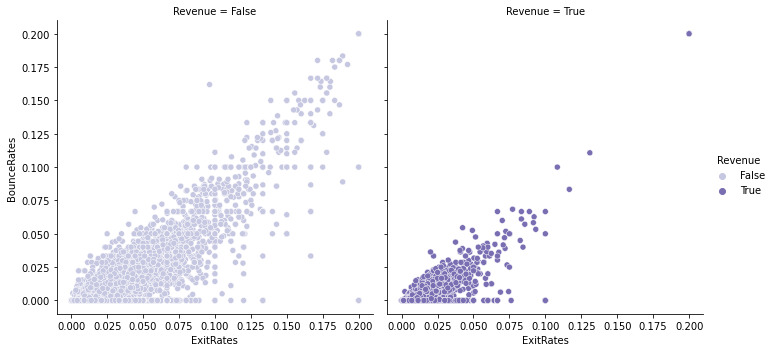

In [ ]:
sns.relplot(y="BounceRates", x="ExitRates",col="Revenue",hue="Revenue", data=data, palette='Purples')

Text(0.5, 1.0, 'Administrative_Duration vs Revenue')

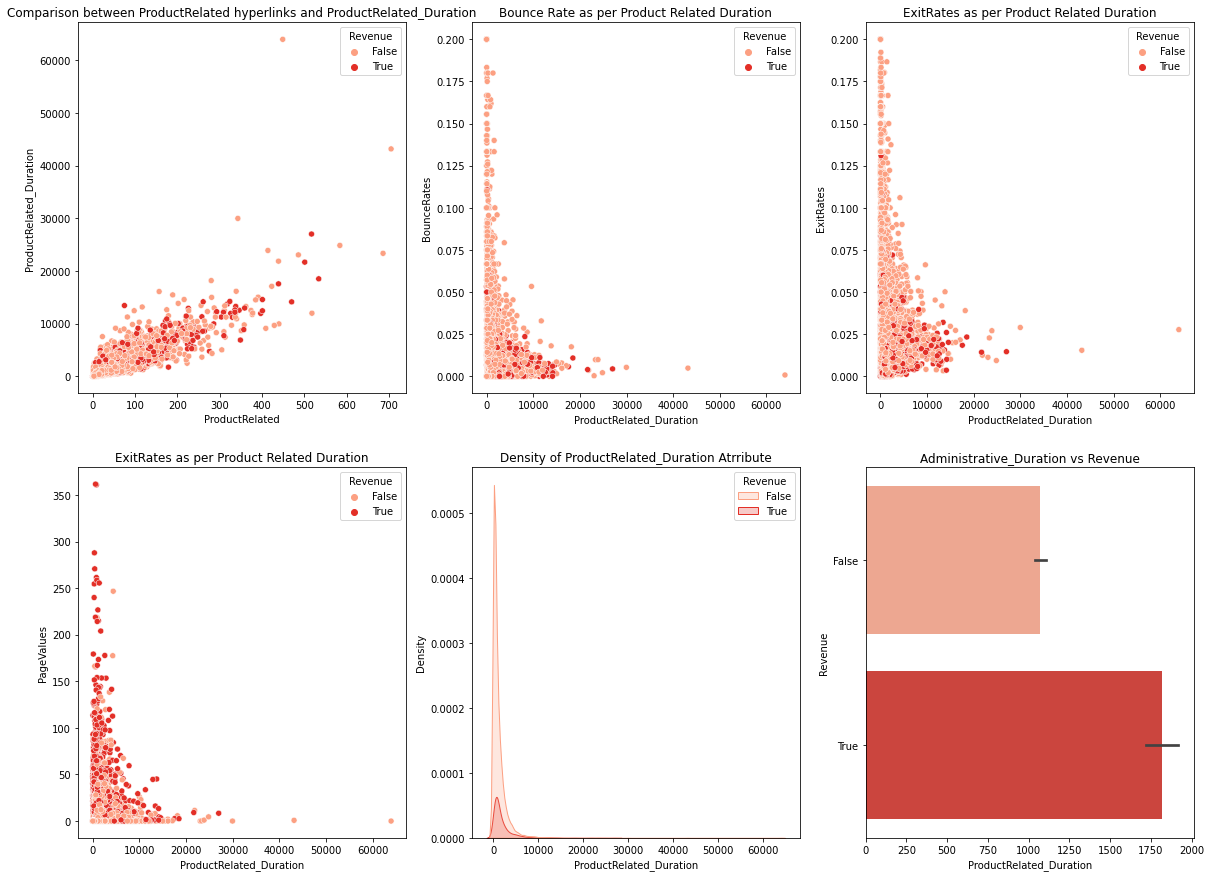

In [ ]:
plt.figure(figsize=(20,15))
ax=plt.subplot(231)
sns.scatterplot(x=data['ProductRelated'], y=data['ProductRelated_Duration'], hue=data['Revenue'], palette ='Reds')
plt.title('Comparison between ProductRelated hyperlinks and ProductRelated_Duration')
ax=plt.subplot(232)
sns.scatterplot(x=data['ProductRelated_Duration'], y=data['BounceRates'],hue=data['Revenue'],palette ='Reds')
plt.title('Bounce Rate as per Product Related Duration')
ax=plt.subplot(233)
sns.scatterplot(x=data['ProductRelated_Duration'], y=data['ExitRates'],hue=data['Revenue'],palette ='Reds')
plt.title('ExitRates as per Product Related Duration')
ax=plt.subplot(234)
sns.scatterplot(x=data['ProductRelated_Duration'], y=data['PageValues'],hue=data['Revenue'],palette ='Reds')
plt.title('ExitRates as per Product Related Duration')
ax=plt.subplot(235)
sns.kdeplot(data=data,x='ProductRelated_Duration', color='red', hue='Revenue', fill=True, palette="Reds")
plt.title('Density of ProductRelated_Duration Atrribute')
ax=plt.subplot(236)
sns.barplot( y=data['Revenue'],x=data['ProductRelated_Duration'],palette='Reds', orient='h' )
plt.title('Administrative_Duration vs Revenue')

In [ ]:
#As more project related hyperlinks are clicked the duration increases and more purchases are made
#Exit Rates are slightly higher than bounce rates here  
#Most users spend around 10000 seconds and hence the page values leading to the purchases are higher during the time
#Both Bounce Rates and Exit Rates decrease when Duration increases 
#we can see a rise in the number of purchasers with more time spent

Text(0.5, 1.0, 'Informational_Duration vs Revenue')

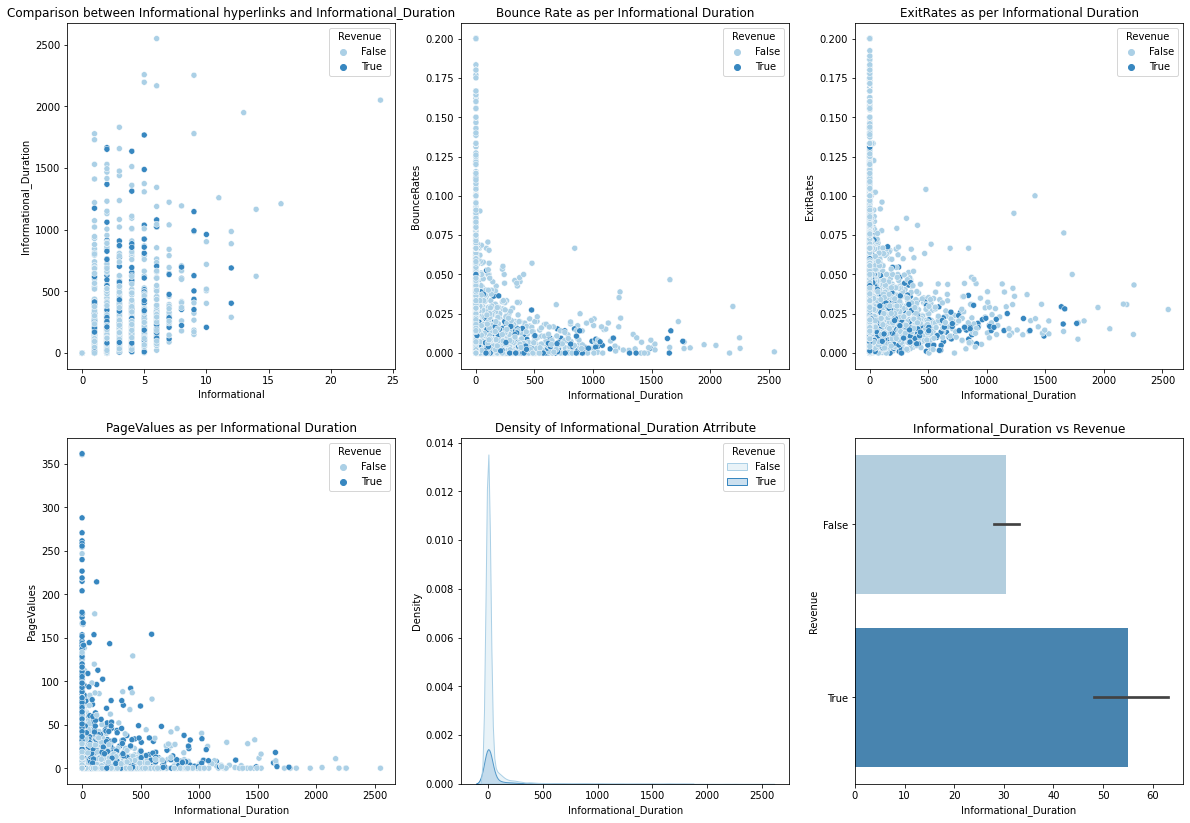

In [ ]:
plt.figure(figsize=(20,14))
ax=plt.subplot(231)
sns.scatterplot(x=data['Informational'], y=data['Informational_Duration'], hue=data['Revenue'], palette ='Blues')
plt.title('Comparison between Informational hyperlinks and Informational_Duration')
ax=plt.subplot(232)
sns.scatterplot(x=data['Informational_Duration'], y=data['BounceRates'],hue=data['Revenue'],palette ='Blues')
plt.title('Bounce Rate as per Informational Duration')
ax=plt.subplot(233)
sns.scatterplot(x=data['Informational_Duration'], y=data['ExitRates'],hue=data['Revenue'],palette ='Blues')
plt.title('ExitRates as per Informational Duration')
ax=plt.subplot(234)
sns.scatterplot(x=data['Informational_Duration'], y=data['PageValues'],hue=data['Revenue'],palette ='Blues')
plt.title('PageValues as per Informational Duration')
ax=plt.subplot(235)
sns.kdeplot(data=data,x='Informational_Duration', color='red', hue='Revenue', fill=True, palette="Blues")
plt.title('Density of Informational_Duration Atrribute')
ax=plt.subplot(236)
sns.barplot( y=data['Revenue'],x=data['Informational_Duration'],palette='Blues', orient='h' )
plt.title('Informational_Duration vs Revenue')

In [ ]:
#With increase in duration for sessions based on informational links viewed, exit rates and bounce rates tend to decrease with increase in Revenue
#Exit rates are more as compared to bounce rates here, that means people did actually spent more time looking at these pages
#We can observe most people spend about 500 to 1000s on informational related hyperlinks or sessions and high page values are observed that lead to purchases 

Text(0.5, 1.0, 'Administrative_Duration vs Revenue')

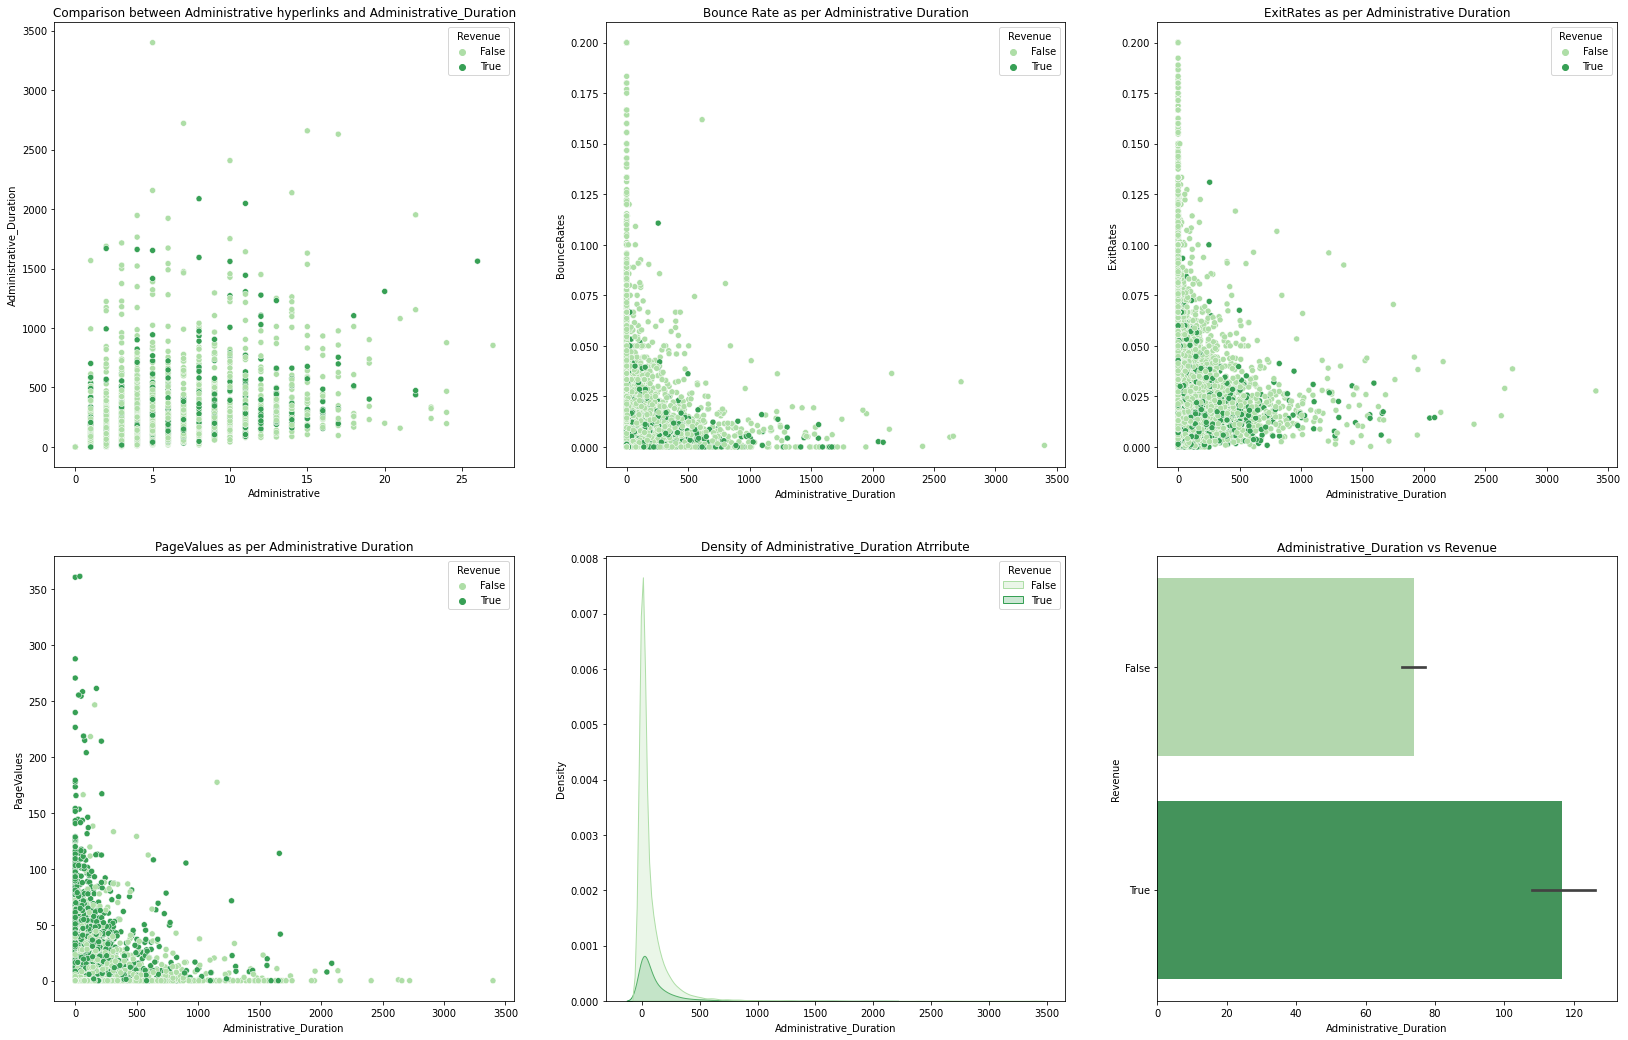

In [ ]:
plt.figure(figsize=(28,18))
ax=plt.subplot(231)
sns.scatterplot(x=data['Administrative'], y=data['Administrative_Duration'], hue=data['Revenue'], palette ='Greens')
plt.title('Comparison between Administrative hyperlinks and Administrative_Duration')
ax=plt.subplot(232)
sns.scatterplot(x=data['Administrative_Duration'], y=data['BounceRates'],hue=data['Revenue'],palette ='Greens')
plt.title('Bounce Rate as per Administrative Duration')
ax=plt.subplot(233)
sns.scatterplot(x=data['Administrative_Duration'], y=data['ExitRates'],hue=data['Revenue'],palette ='Greens')
plt.title('ExitRates as per Administrative Duration')
ax=plt.subplot(234)
sns.scatterplot(x=data['Administrative_Duration'], y=data['PageValues'],hue=data['Revenue'],palette ='Greens')
plt.title('PageValues as per Administrative Duration')
ax=plt.subplot(235)
sns.kdeplot(data=data,x='Administrative_Duration', color='red', hue='Revenue', fill=True, palette="Greens")
plt.title('Density of Administrative_Duration Atrribute')
ax=plt.subplot(236)
sns.barplot( y=data['Revenue'],x=data['Administrative_Duration'],palette='Greens', orient='h' )
plt.title('Administrative_Duration vs Revenue')

In [ ]:
#Most people spend around 500s and 1000s and page values are higher during this time especially during the intial 500s.
#Beyond this time Bounce Rates and Exit Rates decrease 

In [ ]:
month= data.groupby(['Month','Revenue'])[ 'Revenue'].count().reset_index(name='count')
month

,Month,Revenue,count
0,Aug,False,355
1,Aug,True,78
2,Dec,False,1464
3,Dec,True,263
4,Feb,False,181
5,Feb,True,3
6,Jul,False,360
7,Jul,True,72
8,June,False,258
9,June,True,30


Text(0.5, 1.0, 'Purchase')

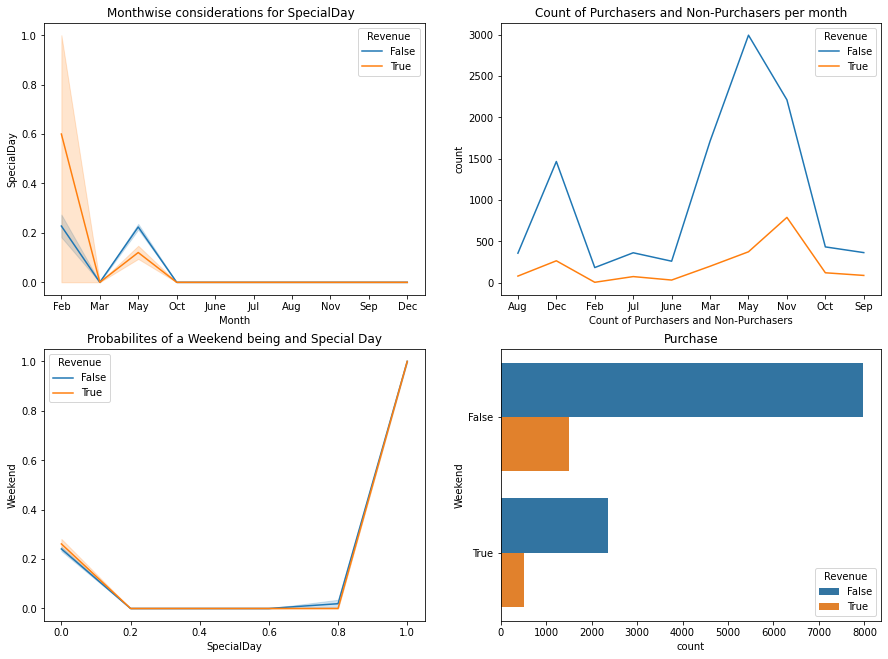

In [ ]:
plt.figure(figsize=(15,11))
ax=plt.subplot(221)
sns.lineplot(y=data['SpecialDay'], x=data['Month'], hue=data['Revenue'])
plt.title('Monthwise considerations for SpecialDay  ')
ax=plt.subplot(222)
sns.lineplot(x='Month', y='count', hue='Revenue', data=month)
plt.xlabel('Count of Purchasers and Non-Purchasers')
plt.title('Count of Purchasers and Non-Purchasers per month')
ax=plt.subplot(223)
sns.lineplot(y='Weekend', x='SpecialDay', hue='Revenue', data=data)
plt.title('Probabilites of a Weekend being and Special Day')
ax=plt.subplot(224)
sns.countplot(y='Weekend', hue='Revenue', data=data)
plt.title('Purchase')

In [ ]:
operatingsys=data.groupby(['OperatingSystems'])['Revenue'].count().reset_index(name='count')
operatingsys

,OperatingSystems,count
0,Android,2555
1,ChromeOS,19
2,FireOS,7
3,MacOS,478
4,Windows,79
5,Windows Phone,6
6,iOS,6601
7,iPAd OS,2585


In [ ]:
operatingsys1=data.groupby(['OperatingSystems','Revenue'])['TrafficType'].count().reset_index(name='count')
operatingsys1

,OperatingSystems,Revenue,count
0,Android,False,2272
1,Android,True,283
2,ChromeOS,False,17
3,ChromeOS,True,2
4,FireOS,False,6
5,FireOS,True,1
6,MacOS,False,391
7,MacOS,True,87
8,Windows,False,24
9,Windows,True,55


In [ ]:
browser1=data.groupby(['Browser','Revenue'])['Revenue'].count().reset_index(name='count')
browser1

,Browser,Revenue,count
0,Brave,False,114
1,Brave,True,21
2,Chrome,False,7073
3,Chrome,True,1355
4,Cliqz,False,7
5,Cliqz,True,3
6,Dolphin,False,41
7,Dolphin,True,8
8,Edge,False,1
9,Edge,True,60


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

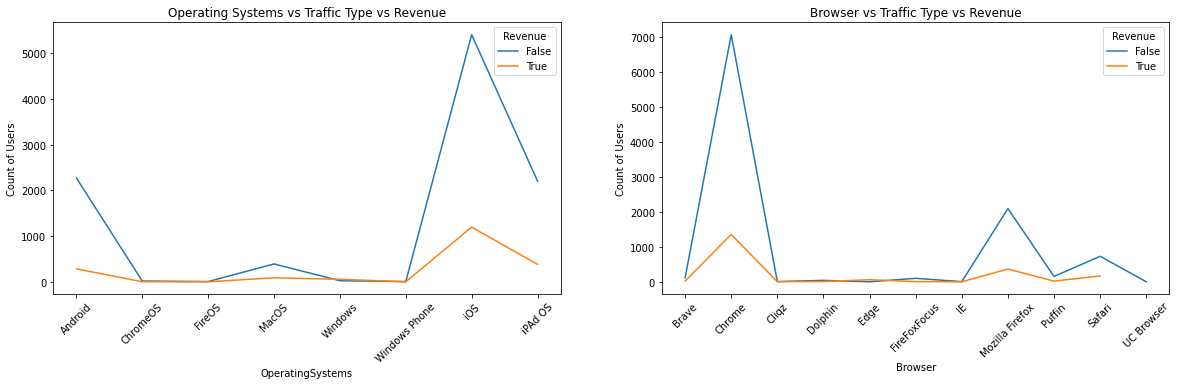

In [ ]:
plt.figure(figsize=(20,5))
ax=plt.subplot(121)
sns.lineplot(y = 'count', x = 'OperatingSystems', hue='Revenue', data = operatingsys1)
plt.title("Operating Systems vs Traffic Type vs Revenue")
plt.xlabel("OperatingSystems")
plt.ylabel("Count of Users")
plt.xticks(rotation=45)
ax=plt.subplot(122)
sns.lineplot(y = 'count', x = 'Browser',hue='Revenue',  data = browser1)
plt.title("Browser vs Traffic Type vs Revenue")
plt.xlabel("Browser")
plt.ylabel("Count of Users")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

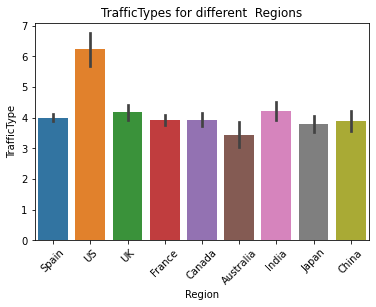

In [ ]:

sns.barplot(x='Region', y='TrafficType', data=data)
plt.title('TrafficTypes for different  Regions')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

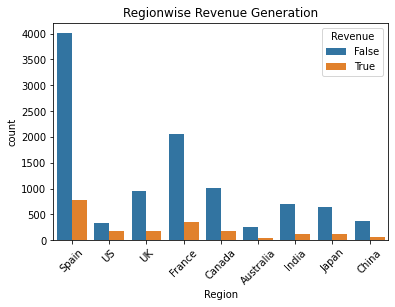

In [ ]:
sns.countplot(x='Region', hue='Revenue', data=data)
plt.title('Regionwise Revenue Generation')
plt.xticks(rotation=45)

#Data Cleaning Process

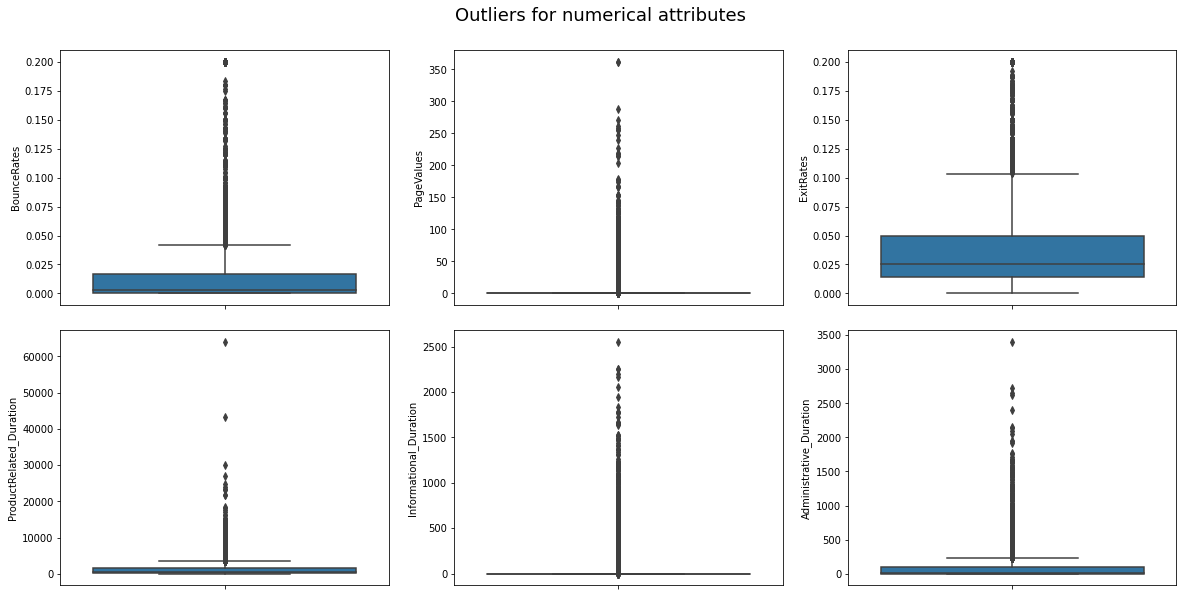

In [ ]:
n_var1= [ 'BounceRates', 'PageValues','ExitRates','ProductRelated_Duration' ,'Informational_Duration','Administrative_Duration', ]
plt.figure(figsize = (20, 15))
plt.subplots_adjust(hspace=0.1)
plt.suptitle("Outliers for numerical attributes", fontsize=18, y=0.92)
r=3
c=3
for i, j in enumerate(n_var1):
  ax=plt.subplot(r,c,i+1)
  sns.boxplot(y=data[j])

#Outlier Removal

In [ ]:
out_rm=['Administrative_Duration', 'BounceRates','ExitRates','ProductRelated_Duration']

In [ ]:
for val in out_rm:
  Quart1 = data[val].quantile(0.25)
  Quart3 = data[val].quantile(0.75)
  Inter_Quartile_Range = Quart3 - Quart1 #finding interquartile range
  
  low=data[val] >= Quart1 - 1.5 * Inter_Quartile_Range #lowerbound
  upper=data[val] <= Quart3+ 1.5 * Inter_Quartile_Range #upperbound
  data=data.loc[(low) & (upper)] #removing outliers

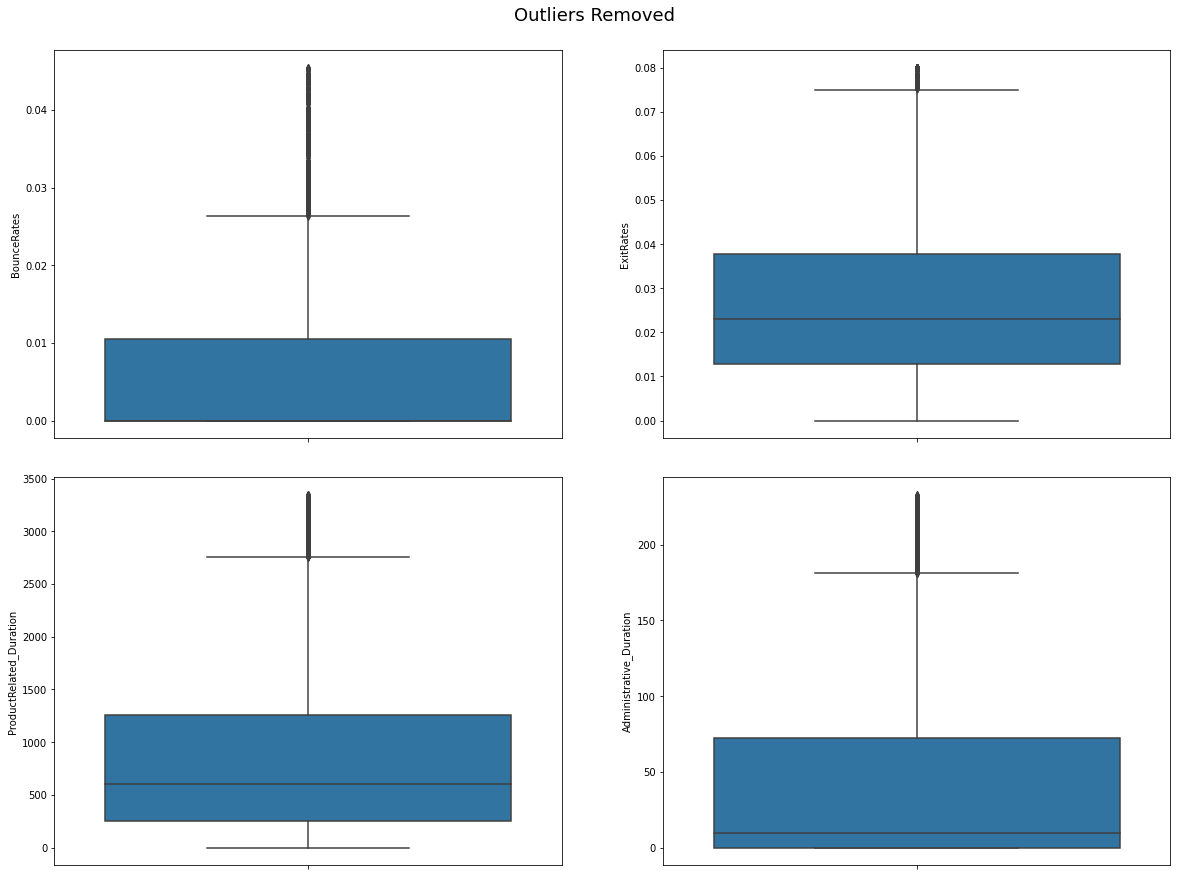

In [ ]:
n_var1= [ 'BounceRates','ExitRates','ProductRelated_Duration','Administrative_Duration', ]
plt.figure(figsize = (20, 15))
plt.subplots_adjust(hspace=0.1)
plt.suptitle("Outliers Removed", fontsize=18, y=0.92)
r=2
c=2
for i, j in enumerate(n_var1):
  ax=plt.subplot(r,c,i+1)
  sns.boxplot(y=data[j])

In [ ]:
def data_cleaning(data):

  data.OperatingSystems[data.OperatingSystems =='Android'] = 3
  data.OperatingSystems[data.OperatingSystems =='iOS']= 2
  data.OperatingSystems[data.OperatingSystems=='iPAd OS'] = 1
  data.OperatingSystems[data.OperatingSystems=='MacOS']= 4
  data.OperatingSystems[data.OperatingSystems=='FireOS']= 7
  data.OperatingSystems[data.OperatingSystems =='ChromeOS']= 6
  data.OperatingSystems[data.OperatingSystems =='Windows']= 8
  data.OperatingSystems[data.OperatingSystems=='Windows Phone'] =5

  data.OperatingSystems= data.OperatingSystems.astype(int)

  data.Region[data.Region == 'Spain'] = 1
  data.Region[data.Region == 'UK'] = 2
  data.Region[data.Region == 'France'] = 3
  data.Region[data.Region == 'Canada'] = 4
  data.Region[data.Region == 'Australia'] = 5
  data.Region[data.Region == 'India'] = 6
  data.Region[data.Region == 'Japan'] = 7
  data.Region[data.Region == 'China'] = 8
  data.Region[data.Region == 'US'] = 9

  data.Region = data.Region.astype(int)

  data.Weekend[data.Weekend == 'True'] = 1
  data.Weekend[data.Weekend == 'False'] = 0
  data.Weekend = data.Weekend.astype(int)

  data.Month[data.Month == 'Feb'] = 2
  data.Month[data.Month == 'Mar'] = 3
  data.Month[data.Month == 'May'] = 5
  data.Month[data.Month == 'June'] = 6
  data.Month[data.Month == 'Jul'] = 7
  data.Month[data.Month == 'Aug'] = 8
  data.Month[data.Month == 'Sep'] = 9
  data.Month[data.Month == 'Oct'] = 10
  data.Month[data.Month == 'Nov'] = 11
  data.Month[data.Month == 'Dec'] = 12
  data.Month = data.Month.astype(int)
  
  data.VisitorType[data.VisitorType == 'Returning_Visitor'] = 1
  data.VisitorType[data.VisitorType == 'New_Visitor'] = 2
  data.VisitorType = data.VisitorType.astype(int)

  data.Browser[data.Browser=='Mozilla Firefox']=1
  data.Browser[data.Browser=='Chrome']=2
  data.Browser[data.Browser=='FireFoxFocus']=3
  data.Browser[data.Browser=='Safari']=4
  data.Browser[data.Browser=='Puffin']=1
  data.Browser[data.Browser=='Dolphin']=7
  data.Browser[data.Browser=='Brave']=8
  data.Browser[data.Browser=='UC Browser']=9
  data.Browser[data.Browser=='Edge']= 10
  data.Browser[data.Browser=='Cliqz']=11
  data.Browser[data.Browser=='IE']=12

  data.Browser=data.Browser.astype(int)

  data.Revenue[data.Revenue == 'True'] = 1
  data.Revenue[data.Revenue == 'False'] = 0
  data.Revenue = data.Revenue.astype(int)

  return data

In [ ]:
data = data_cleaning(data)

<ipython-input-40-a30f2f8d3b44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.OperatingSystems[data.OperatingSystems =='iOS']= 2
<ipython-input-40-a30f2f8d3b44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.OperatingSystems[data.OperatingSystems=='iPAd OS'] = 1
<ipython-input-40-a30f2f8d3b44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.OperatingSystems[data.OperatingSystems=='MacOS']= 4
<ipython-input-40-a30f2

#Scalling Data and Splitting Data

In [ ]:
reqd_columns=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'Month','OperatingSystems', 'Browser', 'Region', 'TrafficType','VisitorType']
dropd=['SpecialDay','Weekend','Revenue']
scl = StandardScaler()
ft_sc = scl.fit_transform(data.drop(dropd,axis = 1),)
x =  pd.DataFrame(ft_sc,columns=reqd_columns)
y = data.Revenue

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=55, stratify=y)

In [ ]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(6050, 15) (2594, 15) (6050,) (2594,)


#RandomForest

In [ ]:
randomf=RandomForestClassifier(n_estimators=140,criterion='entropy',random_state=55).fit(x_train,y_train)
random_pred= randomf.predict(x_test)

In [ ]:
mrndf=round(metrics.accuracy_score(y_test, random_pred)*100)

In [ ]:
print(' Accuracy found for RandomForest',round(metrics.accuracy_score(y_test, random_pred)*100))
cls_rpt=classification_report(y_test, random_pred)
print(cls_rpt)

 Accuracy found for RandomForest 89
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2156
           1       0.74      0.58      0.65       438

    accuracy                           0.89      2594
   macro avg       0.83      0.77      0.79      2594
weighted avg       0.89      0.89      0.89      2594



<Figure size 1440x360 with 0 Axes>

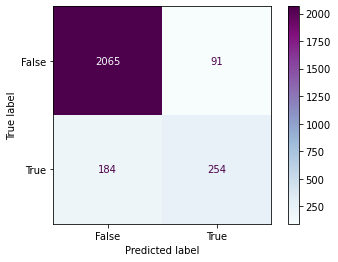

In [ ]:
plt.figure(figsize = (20, 5))
confusion_mat_rnf = confusion_matrix(y_test,random_pred)

cm1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat_rnf, display_labels = [False, True])

cm1.plot(cmap='BuPu')
plt.show()
plt.title("Confusion Matrix")

In [ ]:
model_randf = randomf.predict_proba(x_test)[:,1]
rn_fr_fpr, rn_fr_tpr, rn_fr_thresholds = roc_curve(y_test, model_randf)

#K Nearest Neighbour

In [ ]:
er_rt=[]
accuracy=[]
for i in range(1,40):
    knn_cls = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_predict = knn_cls.predict(x_test)
    er_rt.append(np.mean(knn_cls.predict(x_test)!= y_test))
    accuracy.append(metrics.accuracy_score(y_test, y_predict))

In [ ]:
minimum_error_rate =min(er_rt)
maximum_accuracy = max(accuracy)
for i, (error, score) in enumerate(zip(er_rt, accuracy)):
  if error == minimum_error_rate:
    print( 'We found minimum error at k value',i+1 ,'where Error is',error*100, )
  if score == maximum_accuracy:
    print('We found maximum accuracy at k value=',i+1 , ' where Accuracy is=',score*100)

We found minimum error at k value 7 where Error is 12.374710871241327
We found maximum accuracy at k value= 7  where Accuracy is= 87.62528912875868


Text(0.5, 1.0, 'Accuracy scores found per k values')

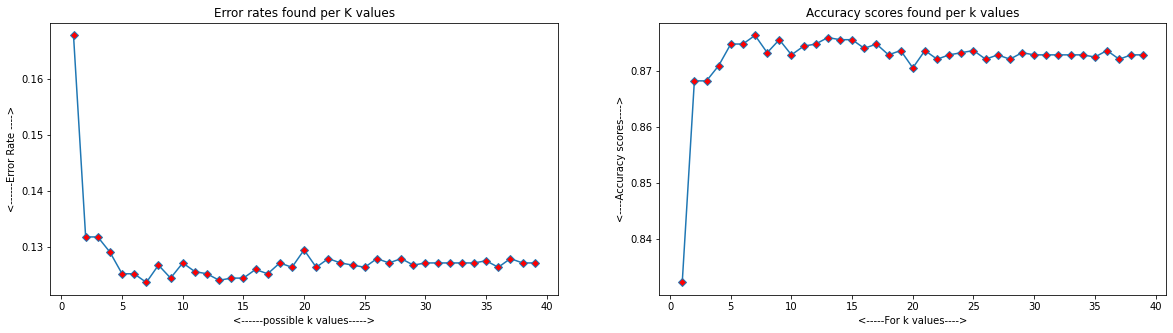

In [ ]:
plt.figure(figsize = (20, 5))
ax=plt.subplot(121)
plt.plot(range(1,40),er_rt,marker='D', markerfacecolor='red')
plt.xlabel('<------possible k values----->')
plt.ylabel('<------Error Rate ---->')
plt.title('Error rates found per K values')
ax=plt.subplot(122)
plt.plot(range(1,40),accuracy,marker='D',markerfacecolor='red')
plt.xlabel('<-----For k values---->')
plt.ylabel('<----Accuracy scores---->')
plt.title('Accuracy scores found per k values')

In [ ]:
knn_classifier = KNeighborsClassifier(7)
knn_classifier.fit(x_train,y_train)
y_pred = knn_classifier.predict(x_test)
model_knn_score = knn_classifier.predict_proba(x_test)[:,1]

In [ ]:
print(' Accuracy found for KNN',round(metrics.accuracy_score(y_test, y_pred)*100))
cls_rpt=classification_report(y_test, y_pred)
print(cls_rpt)

 Accuracy found for KNN 88
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2156
           1       0.77      0.38      0.51       438

    accuracy                           0.88      2594
   macro avg       0.83      0.68      0.72      2594
weighted avg       0.87      0.88      0.86      2594



<Figure size 1440x360 with 0 Axes>

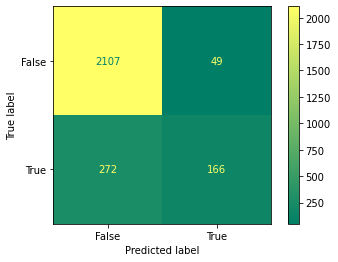

In [ ]:
plt.figure(figsize = (20, 5))
confusion_mat = confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])

cm_display.plot(cmap='summer')
plt.show()

In [ ]:
mknn=round(metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
mt_false_pr, mt_true_pr, mt_trs = roc_curve(y_test, model_knn_score)


#Logistic Regression

In [ ]:
log_rg=LogisticRegression().fit(x_train, y_train)
log_rg_pred = log_rg.predict(x_test)
print('Auccuracy for Logistic Regression',round(metrics.accuracy_score(y_test, log_rg_pred)*100))
log_rg_cls= classification_report(y_test,log_rg_pred)
print(log_rg_cls)

Auccuracy for Logistic Regression 89
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2156
           1       0.81      0.44      0.57       438

    accuracy                           0.89      2594
   macro avg       0.85      0.71      0.75      2594
weighted avg       0.88      0.89      0.87      2594



In [ ]:
mlogrg=round(metrics.accuracy_score(y_test, log_rg_pred)*100)

<Figure size 1440x360 with 0 Axes>

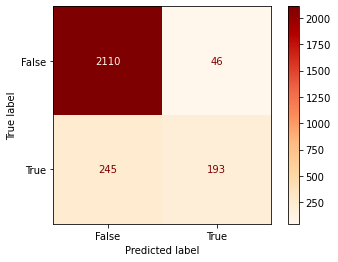

In [ ]:
plt.figure(figsize = (20, 5))
confusion_matlr = confusion_matrix(y_test,log_rg_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matlr, display_labels = [False, True])

cm_display.plot(cmap='OrRd')
plt.show()

In [ ]:
m_log_rg_score = log_rg.predict_proba(x_test)[:,1]
log_rg_fpr, log_rg_tpr, log_rg_thresholds = roc_curve(y_test, m_log_rg_score)

#ROC Curves for Algorithm Comparison

Text(0.5, 1.0, 'Comparisons of Different Algorithms used')

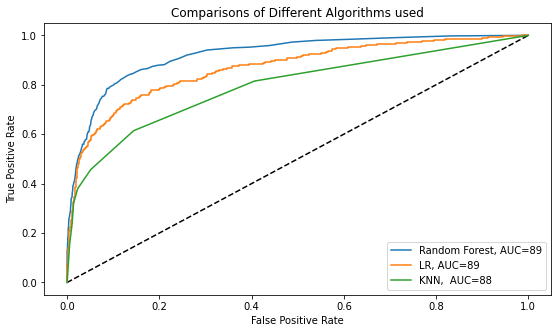

In [ ]:
plt.figure(figsize = (20, 5))
ax=plt.subplot(121)
plt.plot([0,1],[0,1],'k--')
plt.plot(rn_fr_fpr, rn_fr_tpr, label = 'Random Forest, AUC='+str(mrndf))
plt.plot(log_rg_fpr, log_rg_tpr, label='LR, AUC='+str(mlogrg))
plt.plot(mt_false_pr, mt_true_pr, label='KNN,  AUC='+str(mknn))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Comparisons of Different Algorithms used')